# Demo of the NFLAM package

In the following we will demonstrate the NFLAM package. It is currently capable of doing impressive things:

In [1]:
import NFLAM

import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=25, noise=0.1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([25, 2])

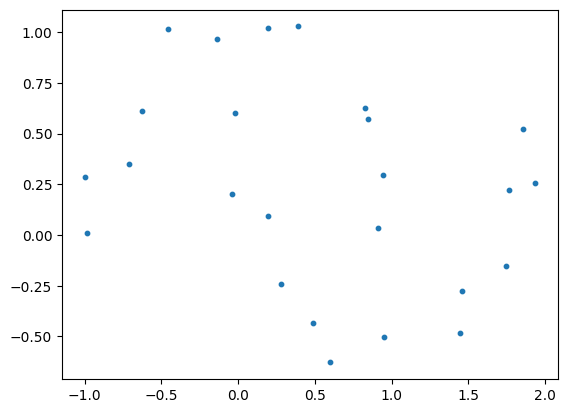

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10)

In [4]:
LAM = NFLAM.NFLAM(data)

Epoch 1 | Loss: 2.5004: 100%|██████████| 1/1 [00:00<00:00, 21.74it/s]
h:\Uni\Master\Thesis\NFLAM\NFLAM\.venv\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
point1 = data[0].reshape(1, 2) #torch.tensor([[2.0, 0.0]], dtype=torch.float32)
point2 = data[2].reshape(1, 2) #torch.tensor([[-1.0, 0.0]], dtype=torch.float32)

LAM.distance(point1, point2)

0.009483657457167283

In [6]:
points, d = LAM.distances_to_point(point1)

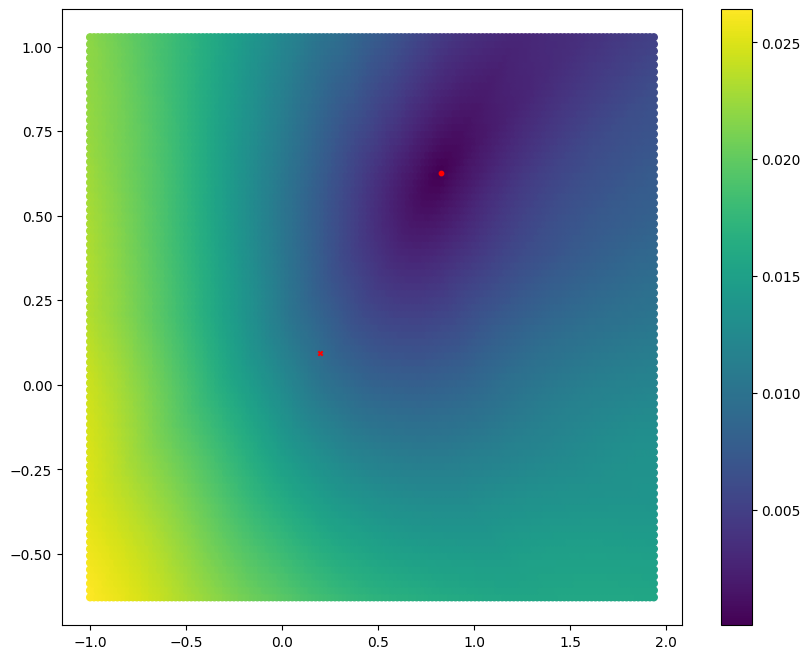

In [7]:
# plot point with the colour of the distance to the point
plt.figure(figsize=(10, 8))
plt.scatter(points[:, 0], points[:, 1], c=d, s=25)
plt.colorbar()
plt.scatter(point1[0, 0], point1[0, 1], c='red', s=10)
plt.scatter(point2[0, 0], point2[0, 1], c='red', s=10, marker='x')

plt.show()

In [8]:
func = LAM._generate_metric_function(data)

In [9]:
func(data[0], data[2])

tensor([0.8248, 0.6248]) tensor([0.1964, 0.0942])
11997 n
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 2

0.014389662188477814

In [10]:
data[0], data[2]

(tensor([0.8248, 0.6248]), tensor([0.1964, 0.0942]))

In [12]:
# generate a 10x10 grid of points between -1 and 1

x = torch.linspace(-1, 1, 10)
y = torch.linspace(-1, 1, 10)

X, Y = torch.meshgrid(x, y)

points = torch.stack([X.flatten(), Y.flatten()], dim=1)

In [13]:
from scipy.spatial import KDTree

p1 = data[0].reshape(1, 2)
p2 = data[1].reshape(1, 2)
p3 = data[2].reshape(1, 2)

ps = torch.cat([p1, p2, p3], dim=0)

In [16]:
kdtree = KDTree(points.numpy())

_, indices = kdtree.query(ps.numpy(), k=5)

In [17]:
indices

array([[87, 88, 97, 98, 77],
       [29, 39, 28, 38, 19],
       [55, 65, 54, 64, 56]], dtype=int64)